1. [Testing calc_rsq](#Testing-calc_rsq)
    1. [Generating Random Correlation Matrices](#Generate-random-correlation-matrices)
    2. [Real Data](#Real-Data)
    3. [Try out the new icc function too](#Try-out-the-new-icc-function-too)
    4. [Generate known correlation matrices](#Generate-known-correlation-matrices)

# Testing `calc_rsq`

We're getting weird results from our iterations, so let's see what's going on. I'm going to run through this code in python2 and python3.

In [1]:
import sys
print (sys.version)

2.7.12 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def exclude_nan(x,y):
    """
    Exclude NaN values if either entry in a pair of vectors has NaN
    """
    idx = np.logical_not(np.logical_or(np.isnan(x), np.isnan(y)))
    x = x[idx]
    y = y[idx]
    n = len(x)
    return [x, y, n]

def compute_icc(av_corr_mat_A, av_corr_mat_B):
    """
    This function computes the inter-class correlation (ICC) of the
    two classes represented by the x and y numpy vectors.
    """

    inds = np.triu_indices_from(av_corr_mat_B, k=1)
    x = av_corr_mat_A[inds]
    y = av_corr_mat_B[inds]
    
    if all(x == y):
        return 1

    [x, y, n] = exclude_nan(x,y)

    ## Need at least 3 data points to compute this
    if n < 3:
        return np.nan

    Sx = sum(x); Sy = sum(y);
    Sxx = sum(x*x); Sxy = sum( (x+y)**2 )/2; Syy = sum(y*y)

    fact = ((Sx + Sy)**2)/(n*2)
    SS_tot = Sxx + Syy - fact
    SS_among = Sxy - fact
    SS_error = SS_tot - SS_among

    MS_error = SS_error/n
    MS_among = SS_among/(n-1)
    ICC = (MS_among - MS_error) / (MS_among + MS_error)

    return ICC

In [4]:
def calc_rsq(av_corr_mat_A, av_corr_mat_B):
    """
    From wikipedia: https://en.wikipedia.org/wiki/Coefficient_of_determination
    
    Rsq = 1 - (SSres / SStot)
    
    SSres is calculated as the sum of square errors (where the error
    is the difference between x and y).
    
    SStot is calculated as the total sum of squares in y.
    """
    # Get the data we need
    inds = np.triu_indices_from(av_corr_mat_B, k=1)
    x = av_corr_mat_A[inds]
    y = av_corr_mat_B[inds]
    
    # Calculate the error/residuals
    res = y - x

    SSres = np.sum(res**2)
    
    # Sum up the total error in y
    y_var = y - np.mean(y)
    
    SStot = np.sum(y_var**2)
    
    # R squared
    Rsq = 1 - (SSres/SStot)
    
    return Rsq

## Generate random correlation matrices

In [5]:
df1 = pd.DataFrame(np.random.normal(0, 1, size=(100, 20)))
df2 = pd.DataFrame(np.random.normal(0, 1, size=(100, 20)))
df1corrmat = df1.corr()
df2corrmat = df2.corr()

In [6]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.825003,0.628674,-0.482063,-0.830073,0.659061,-0.434853,-0.628980,1.103790,-0.450128,1.105812,0.025894,1.939549,0.751261,-0.920886,1.003333,0.390014,-1.289905,0.243906,1.563004,-0.462072
1,-1.312443,1.657896,2.265637,0.971658,0.027020,-1.392888,0.760212,1.628249,1.596027,0.756247,1.224875,-0.459414,0.160181,0.850087,0.344910,-0.556644,-0.945418,0.845107,0.797687,0.837204
2,0.552673,-0.435331,-1.350999,-0.379398,0.661491,-0.690591,-0.094448,-1.830081,-0.154223,1.046078,1.115418,1.254835,0.641765,-0.581357,1.019495,0.430014,0.689625,-1.720961,1.523554,0.109562
3,-0.126231,-1.179243,0.690867,-0.320864,-0.022126,-0.102475,0.753876,1.466728,0.355806,-0.613118,-1.234247,-0.723220,0.496598,1.378928,0.555424,1.656294,0.872336,-0.750507,0.599133,-0.176478
4,-0.530854,1.531872,0.299568,-0.411871,-1.578412,-0.671293,-1.413112,-0.165248,-2.688436,-0.723880,1.269186,-0.195511,1.337453,0.650659,-0.527048,0.507945,-1.293223,-0.440477,-3.001808,0.223559


In [7]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.445382,0.533503,-1.603318,0.084216,0.842161,1.405861,-0.150629,0.932143,-1.097461,0.401060,1.460268,1.476603,0.846875,-0.461616,-0.165040,-1.284210,0.125707,0.514477,-0.622531,-0.518085
1,0.062765,-0.218558,-0.421090,-1.295118,-1.823517,0.119271,0.100557,0.633833,0.895647,0.014345,0.788362,-1.050699,1.038755,0.662584,-0.877964,-0.084827,-0.857793,0.068997,0.256537,-2.543842
2,1.511053,-0.152590,-0.193754,0.602245,-2.712511,0.124742,-0.651924,1.168784,-1.023526,2.238558,-0.724600,0.417576,0.761629,0.658318,-1.363365,-1.741313,-0.588373,-1.185299,-1.127238,0.443740
3,0.762832,0.464988,-0.218328,1.449274,-0.339726,-0.830286,0.111913,0.246303,-0.002630,0.669172,0.215681,0.724155,0.173039,-0.189092,-0.820968,-0.948329,-0.007777,0.386600,-0.920093,1.965873
4,-0.894424,0.785229,-0.692535,-0.737180,-0.578115,0.695734,-1.072092,1.249546,-0.645241,0.046298,0.929943,-0.484525,0.084519,0.613200,0.580862,0.552624,0.629671,0.461160,0.827764,-0.606338


In [8]:
df1corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.148312,0.111963,0.152052,-0.002506,0.129097,-0.101924,-0.100342,0.067778,-0.021849,-0.027218,0.133492,0.148401,-0.060990,0.014463,0.005689,0.047193,0.033624,-0.042064,-0.124066
1,-0.148312,1.000000,0.050448,-0.128426,-0.008692,-0.123610,0.022058,0.147388,0.024288,0.075817,0.058665,-0.124523,0.065126,-0.105433,0.005591,-0.035636,0.002991,0.088161,0.037648,-0.071143
2,0.111963,0.050448,1.000000,0.059545,0.068886,-0.067747,-0.111594,-0.186252,0.054183,-0.123805,0.001710,-0.091203,-0.005218,-0.003583,-0.083480,-0.012566,-0.080033,0.104433,0.006712,0.198519
3,0.152052,-0.128426,0.059545,1.000000,0.013722,0.046021,-0.030395,-0.107956,-0.207286,0.004455,0.150866,-0.041384,0.048609,0.048231,0.062030,0.054316,0.086135,0.033698,-0.049209,-0.016473
4,-0.002506,-0.008692,0.068886,0.013722,1.000000,0.129483,-0.236933,0.061683,0.030876,0.024158,0.053346,0.184510,-0.162945,0.051730,-0.124467,0.053887,0.181119,0.150580,0.242933,0.209635


In [9]:
df2corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.005401,-0.047979,0.007713,-0.047601,0.079783,0.030437,0.054556,-0.063677,0.054362,0.001193,-0.124080,-0.000736,-0.033512,0.159680,-0.160315,0.023002,0.097267,-0.276046,-0.010863
1,0.005401,1.000000,0.018344,0.069176,-0.032471,-0.013077,-0.174434,-0.056129,0.096038,-0.041558,0.040335,0.144297,-0.132891,0.018289,-0.170366,-0.021806,0.035079,0.158048,-0.016748,0.003724
2,-0.047979,0.018344,1.000000,-0.035324,0.069794,-0.188767,-0.144321,0.029874,-0.155294,0.231368,-0.060227,-0.240027,-0.069068,-0.125433,-0.012239,0.056112,-0.082816,-0.088877,-0.036887,-0.039577
3,0.007713,0.069176,-0.035324,1.000000,-0.064350,0.133215,0.003420,-0.084087,0.073180,-0.167311,-0.008568,0.003655,0.053615,-0.009607,0.059704,-0.156180,0.063806,-0.003756,-0.072506,0.151567
4,-0.047601,-0.032471,0.069794,-0.064350,1.000000,-0.055998,0.088714,-0.168365,-0.086120,-0.153994,0.122008,-0.071696,0.034372,-0.025569,0.035435,-0.023938,-0.078357,0.038849,-0.057456,-0.017855


### Calculate $R^2$ from random matrices

In [10]:
calc_rsq(df1.corr().as_matrix(), df2.corr().as_matrix())

-1.1868507699771378

Now let's walk through the code above to see what it's doing.

In [11]:
inds = np.triu_indices_from( df2.corr().as_matrix(), k=1)
inds

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13,
        13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16,
        17, 17, 18]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14

In [12]:
x =  df1.corr().as_matrix()[inds]
y =  df2.corr().as_matrix()[inds]

In [13]:
print(str(df1.corr().shape) + " matrix gives an upper triangle with length " + str((20*(20-1))/2))

(20, 20) matrix gives an upper triangle with length 190


`df.corr()` is a $20\times 20$ matrix, so getting the upper triangle should give us $\frac{20\cdot (20-1)}{2}=190$ cells in the upper triangle.

In [14]:
len(x)

190

Yay, we get what we expect!

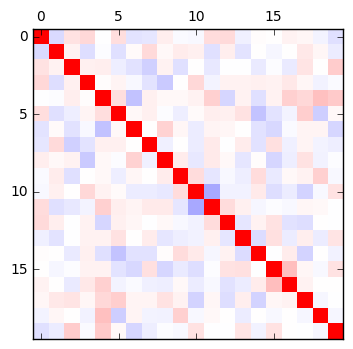

In [15]:
plt.matshow(df1.corr(), vmin=-1, vmax=1, cmap='bwr')

In [16]:
df1.corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.00,-0.15,0.11,0.15,-0.00,0.13,-0.10,-0.10,0.07,-0.02,-0.03,0.13,0.15,-0.06,0.01,0.01,0.05,0.03,-0.04,-0.12
1,-0.15,1.00,0.05,-0.13,-0.01,-0.12,0.02,0.15,0.02,0.08,0.06,-0.12,0.07,-0.11,0.01,-0.04,0.00,0.09,0.04,-0.07
2,0.11,0.05,1.00,0.06,0.07,-0.07,-0.11,-0.19,0.05,-0.12,0.00,-0.09,-0.01,-0.00,-0.08,-0.01,-0.08,0.10,0.01,0.20
3,0.15,-0.13,0.06,1.00,0.01,0.05,-0.03,-0.11,-0.21,0.00,0.15,-0.04,0.05,0.05,0.06,0.05,0.09,0.03,-0.05,-0.02
4,-0.00,-0.01,0.07,0.01,1.00,0.13,-0.24,0.06,0.03,0.02,0.05,0.18,-0.16,0.05,-0.12,0.05,0.18,0.15,0.24,0.21
5,0.13,-0.12,-0.07,0.05,0.13,1.00,0.03,0.06,-0.02,-0.07,0.02,0.07,0.06,0.11,-0.23,-0.10,-0.04,0.19,-0.19,0.02
6,-0.10,0.02,-0.11,-0.03,-0.24,0.03,1.00,0.00,0.18,0.03,-0.08,0.05,0.03,0.00,-0.12,-0.15,-0.02,0.04,0.04,-0.16
7,-0.10,0.15,-0.19,-0.11,0.06,0.06,0.00,1.00,-0.06,0.00,-0.07,0.08,-0.00,0.07,-0.11,0.12,-0.06,0.04,-0.04,-0.07
8,0.07,0.02,0.05,-0.21,0.03,-0.02,0.18,-0.06,1.00,0.08,-0.09,0.08,0.03,-0.10,0.01,-0.16,-0.07,0.11,-0.05,-0.01
9,-0.02,0.08,-0.12,0.00,0.02,-0.07,0.03,0.00,0.08,1.00,0.14,-0.10,-0.03,-0.06,0.14,-0.09,0.03,0.05,0.19,-0.03


In [17]:
x.round(2)

array([-0.15,  0.11,  0.15, -0.  ,  0.13, -0.1 , -0.1 ,  0.07, -0.02,
       -0.03,  0.13,  0.15, -0.06,  0.01,  0.01,  0.05,  0.03, -0.04,
       -0.12,  0.05, -0.13, -0.01, -0.12,  0.02,  0.15,  0.02,  0.08,
        0.06, -0.12,  0.07, -0.11,  0.01, -0.04,  0.  ,  0.09,  0.04,
       -0.07,  0.06,  0.07, -0.07, -0.11, -0.19,  0.05, -0.12,  0.  ,
       -0.09, -0.01, -0.  , -0.08, -0.01, -0.08,  0.1 ,  0.01,  0.2 ,
        0.01,  0.05, -0.03, -0.11, -0.21,  0.  ,  0.15, -0.04,  0.05,
        0.05,  0.06,  0.05,  0.09,  0.03, -0.05, -0.02,  0.13, -0.24,
        0.06,  0.03,  0.02,  0.05,  0.18, -0.16,  0.05, -0.12,  0.05,
        0.18,  0.15,  0.24,  0.21,  0.03,  0.06, -0.02, -0.07,  0.02,
        0.07,  0.06,  0.11, -0.23, -0.1 , -0.04,  0.19, -0.19,  0.02,
        0.  ,  0.18,  0.03, -0.08,  0.05,  0.03,  0.  , -0.12, -0.15,
       -0.02,  0.04,  0.04, -0.16, -0.06,  0.  , -0.07,  0.08, -0.  ,
        0.07, -0.11,  0.12, -0.06,  0.04, -0.04, -0.07,  0.08, -0.09,
        0.08,  0.03,

These also match, so that's good. Time to walk through the $R^2$ calculation.

In [18]:
res = y - x
res

array([ 0.15371265, -0.15994209, -0.14433975, -0.04509462, -0.04931401,
        0.1323617 ,  0.15489769, -0.13145485,  0.07621104,  0.02841156,
       -0.25757208, -0.14913752,  0.02747775,  0.14521779, -0.16600389,
       -0.02419108,  0.06364352, -0.23398195,  0.11320249, -0.03210394,
        0.197602  , -0.0237789 ,  0.11053297, -0.19649237, -0.20351647,
        0.07175044, -0.11737452, -0.01833048,  0.26881966, -0.1980165 ,
        0.12372207, -0.17595666,  0.01382961,  0.03208798,  0.06988703,
       -0.05439675,  0.07486719, -0.09486938,  0.00090791, -0.12101977,
       -0.03272771,  0.21612665, -0.20947714,  0.35517346, -0.06193708,
       -0.14882431, -0.06385042, -0.12185042,  0.07124006,  0.06867829,
       -0.00278256, -0.19331054, -0.0435993 , -0.23809591, -0.07807222,
        0.087194  ,  0.03381438,  0.0238684 ,  0.28046656, -0.17176658,
       -0.15943389,  0.04503954,  0.00500599, -0.05783732, -0.00232673,
       -0.21049611, -0.02232854, -0.03745397, -0.02329675,  0.16

In [19]:
SSres = np.sum(res**2)
SSres

3.9554436673985869

In [20]:
# Sum up the total error in y
y_var = y - np.mean(y)
y_var

array([  1.51452402e-02,  -3.82349348e-02,   1.74571822e-02,
        -3.78560132e-02,   8.95275535e-02,   4.01818079e-02,
         6.42999944e-02,  -5.39324571e-02,   6.41064949e-02,
         1.09379816e-02,  -1.14335263e-01,   9.00808026e-03,
        -2.37679217e-02,   1.69424802e-01,  -1.50570381e-01,
         3.27463870e-02,   1.07011857e-01,  -2.66301760e-01,
        -1.11900146e-03,   2.80885115e-02,   7.89201319e-02,
        -2.27263352e-02,  -3.33217732e-03,  -1.64689655e-01,
        -4.63844099e-02,   1.05782495e-01,  -3.18130764e-02,
         5.00794786e-02,   1.54041235e-01,  -1.23146246e-01,
         2.80337769e-02,  -1.60621336e-01,  -1.20614049e-02,
         4.48233136e-02,   1.67792387e-01,  -7.00396413e-03,
         1.34687557e-02,  -2.55795348e-02,   7.95381664e-02,
        -1.79022208e-01,  -1.34576944e-01,   3.96186500e-02,
        -1.45549178e-01,   2.41112867e-01,  -5.04825107e-02,
        -2.30282820e-01,  -5.93238268e-02,  -1.15688855e-01,
        -2.49496707e-03,

In [21]:
SStot = np.sum(y_var**2)
SStot

1.8087396367882655

In [22]:
# R squared
Rsq = 1 - (SSres/SStot)
Rsq

-1.1868507699771378

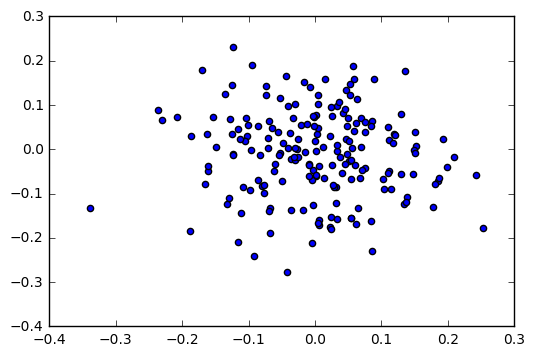

In [23]:
plt.scatter(x, y)

### Conclusion

Python 3: This works as expected, but we had to use `as_matrix()` to get it to not error in `calc_rsq()`.
Python 2: This works as expected, but we had to use `as_matrix()` to get it to not error in `calc_rsq()`.

# Real Data

In [24]:
behav_data_f = 'Phenotypic_V1_0b_preprocessed1.csv'

In [25]:
df = pd.read_csv(behav_data_f)
df = df.loc[df['func_perc_fd'].notnull(), :]
df = df.loc[df['FILE_ID']!='no_filename', :]
df['AGE_YRS'] = np.floor(df['AGE_AT_SCAN'])
df.head()

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,24.0
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,19.0
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0,13.0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1,13.0
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,...,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1,17.0


In [26]:
nsubs = 100
start1 = 0
start2 = 100
for i, (sub, f_id) in enumerate(df.loc[start1:(start1+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat = ts_df.corr()

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat1 = np.empty([corr_mat.shape[0], corr_mat.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat1[:, :, i] = corr_mat

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat1 = np.nanmean(all_corr_mat1, axis=2)

for i, (sub, f_id) in enumerate(df.loc[start2:(start2+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat = ts_df.corr()

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat2 = np.empty([corr_mat.shape[0], corr_mat.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat2[:, :, i] = corr_mat

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat2 = np.nanmean(all_corr_mat2, axis=2)

In [27]:
[all_corr_mat1.shape, all_corr_mat2.shape]

[(116, 116, 100), (116, 116, 100)]

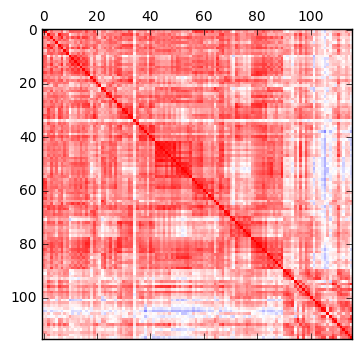

In [28]:
plt.matshow(all_corr_mat1[:,:,0], vmin=-1, vmax=1, cmap='bwr')

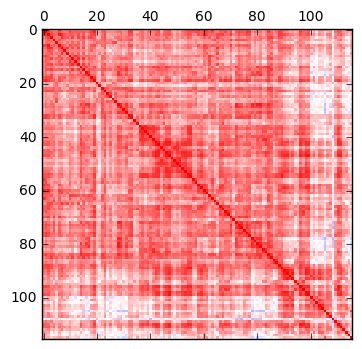

In [29]:
plt.matshow(all_corr_mat1[:,:,9], vmin=-1, vmax=1, cmap='bwr')

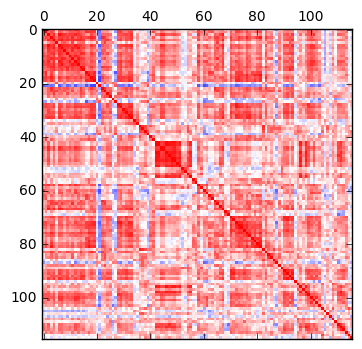

In [30]:
plt.matshow(all_corr_mat2[:,:,0], vmin=-1, vmax=1, cmap='bwr')

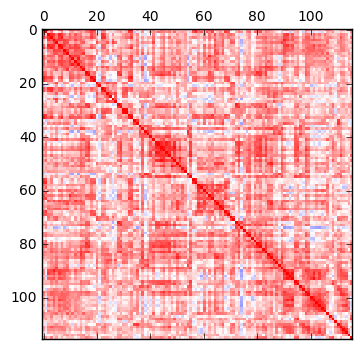

In [31]:
plt.matshow(all_corr_mat2[:,:,9], vmin=-1, vmax=1, cmap='bwr')

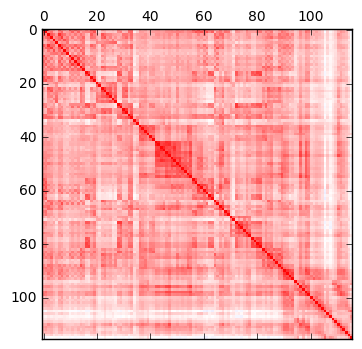

In [32]:
plt.matshow(av_corr_mat1, vmin=-1, vmax=1, cmap='bwr')

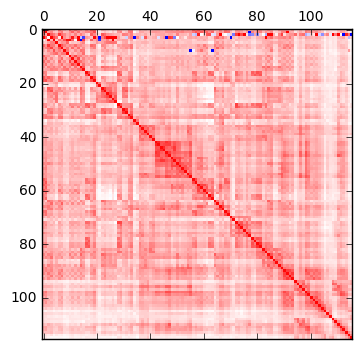

In [33]:
plt.matshow(av_corr_mat2, vmin=-1, vmax=1, cmap='bwr')

In [34]:
np.fill_diagonal(av_corr_mat1, 0)
np.fill_diagonal(av_corr_mat2, 0)

np.round([(av_corr_mat1.min(), av_corr_mat1.max()), (av_corr_mat2.min(), av_corr_mat2.max())])

array([[ -0.00000000e+000,   1.00000000e+000],
       [ -1.22291898e+229,   1.32953997e+177]])

In [35]:
np.fill_diagonal(all_corr_mat1[:,:,89], 0)
np.fill_diagonal(all_corr_mat1[:,:,66], 0)

np.round([(all_corr_mat1[:,:,89].min(), all_corr_mat1[:,:,89].max()), (all_corr_mat1[:,:,66].min(), all_corr_mat1[:,:,66].max())], 2)

array([[-0.27,  0.94],
       [-0.53,  0.93]])

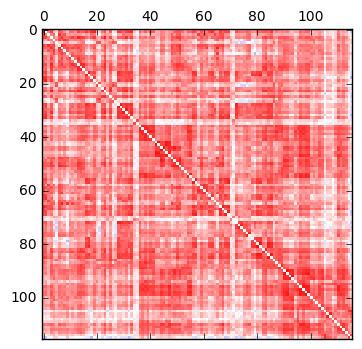

In [36]:
plt.matshow(all_corr_mat1[:,:,89], vmin=-1, vmax=1, cmap='bwr')

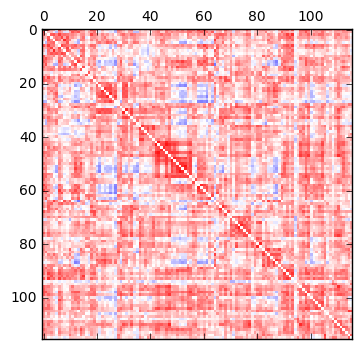

In [37]:
plt.matshow(all_corr_mat1[:,:,66], vmin=-1, vmax=1, cmap='bwr')

In [38]:
calc_rsq(av_corr_mat1, av_corr_mat2)

nan

Apparently we need to Fisher *z* transform them, which is equivalent to the arctanh function.

In [39]:
nsubs = 100
start1 = 0
start2 = 100
for i, (sub, f_id) in enumerate(df.loc[start1:(start1+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat_r = ts_df.corr()
    corr_mat_z = np.arctanh(corr_mat_r)

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat1_z = np.zeros([corr_mat_z.shape[0], corr_mat_z.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat1_z[:, :, i] = corr_mat_z

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat1_z = np.nanmean(all_corr_mat1_z, axis=2)

for i, (sub, f_id) in enumerate(df.loc[start2:(start2+nsubs),['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat_r = ts_df.corr()
    corr_mat_z = np.arctanh(corr_mat_r)
    
    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat2_z = np.zeros([corr_mat_z.shape[0], corr_mat_z.shape[1], nsubs])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat2_z[:, :, i] = corr_mat_z

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat2_z = np.nanmean(all_corr_mat2_z, axis=2)

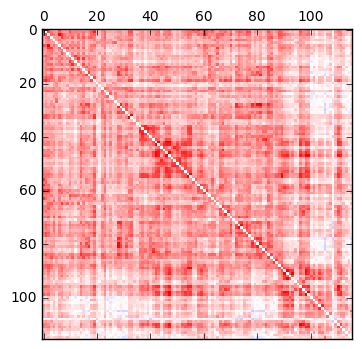

In [40]:
plt.matshow(all_corr_mat1_z[:,:,9], vmin=-1.5, vmax=1.5, cmap='bwr')

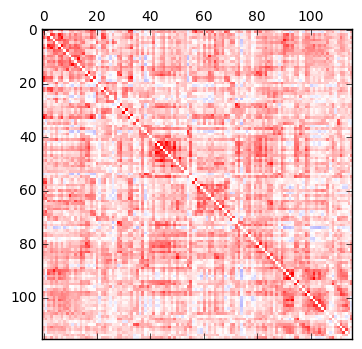

In [41]:
plt.matshow(all_corr_mat2_z[:,:,9], vmin=-1.5, vmax=1.5, cmap='bwr')

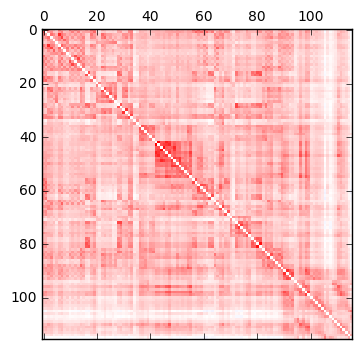

In [42]:
plt.matshow(av_corr_mat1_z, vmin=-1.5, vmax=1.5, cmap='bwr')

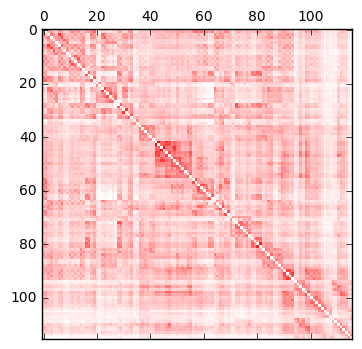

In [43]:
plt.matshow(av_corr_mat2_z, vmin=-1.5, vmax=1.5, cmap='bwr')

In [44]:
np.fill_diagonal(av_corr_mat1_z, 0)
np.fill_diagonal(av_corr_mat2_z, 0)

np.round([(av_corr_mat1_z.min(), av_corr_mat1_z.max()), (av_corr_mat2_z.min(), av_corr_mat2_z.max())],4)

array([[-0.0752,  1.6009],
       [-0.0198,  1.4522]])

In [45]:
calc_rsq(av_corr_mat1_z, av_corr_mat2_z)

0.82211375388083741

In [46]:
calc_rsq(np.random.normal(0,.0001, size=(190,190)), np.random.normal(0,.0001, size=(190,190)))

-0.97699014176766652

In [47]:
covmat = np.zeros((190, 190))
means = np.zeros(190)
np.fill_diagonal(covmat, 1)
datas1=pd.DataFrame(data=np.random.multivariate_normal(means, covmat, size=100))
datas2=pd.DataFrame(data=np.random.multivariate_normal(means, covmat, size=100))
datas1.shape

(100, 190)

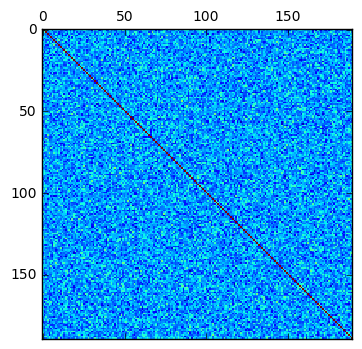

In [48]:
plt.matshow(datas1.corr())

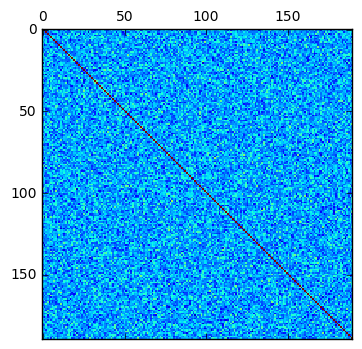

In [49]:
plt.matshow(datas2.corr())

In [50]:
calc_rsq(datas1.corr().as_matrix(), datas2.corr().as_matrix())

-0.99929924077270127

## Try out the new icc function too

In [51]:
compute_icc(datas1.corr().as_matrix(), datas2.corr().as_matrix())

-0.0048614043420021095

In [52]:
compute_icc(av_corr_mat1_z, av_corr_mat2_z)

0.92101435582748625

## Generate known correlation matrices

from [Cross Validated](http://stats.stackexchange.com/a/125017/16294)

`d` is the number of dimensions, and `betaparam` controls the width of distribution of correlation, and sets $\alpha = \beta = \text{betaparam}$

```
function S = vineBeta(d, betaparam)
    P = zeros(d);           %// storing partial correlations
    S = eye(d);

    for k = 1:d-1
        for i = k+1:d
            P(k,i) = betarnd(betaparam,betaparam); %// sampling from beta
            P(k,i) = (P(k,i)-0.5)*2;     %// linearly shifting to [-1, 1]
            p = P(k,i);
            for l = (k-1):-1:1 %// converting partial correlation to raw correlation
                p = p * sqrt((1-P(l,i)^2)*(1-P(l,k)^2)) + P(l,i)*P(l,k);
            end
            S(k,i) = p;
            S(i,k) = p;
        end
    end

    %// permuting the variables to make the distribution permutation-invariant
    permutation = randperm(d);
    S = S(permutation, permutation);
end
```

In [53]:
def randCorrMat(d, betaparam):
    P = np.zeros([d,d])
    S = np.eye(d)
    for k in range(0, d):
        for i in range(k+1, d):
            P[k,i] = np.random.beta(betaparam, betaparam) #sampling from beta
            P[k,i] = (P[k,i] - 0.5)*2 #linearly shifting to [-1, 1]
            p = P[k,i]
            for l in reversed(range(0, k)): #converting partial correlation to raw correlation
                p = p * np.sqrt((1 - P[l,i]**2) * (1 - P[l,k]**2)) + P[l,i] * P[l,k]
            S[k,i] = p
            S[i,k] = p
    S = S[permutation,:][:,permutation]
    return(S)

In [54]:
d = 10; betaparam = 2
S = randCorrMat(d, betaparam)
pd.DataFrame(S)

NameError: global name 'permutation' is not defined

In [ ]:
def df_with_error(mu, Sigma, N, eps_sd):
    aDF = pd.DataFrame(np.random.multivariate_normal(mu, Sigma, N))
    aDF_e = aDF + pd.DataFrame(np.random.normal(0, eps_sd, size=aDF.shape))
    return(aDF_e, aDF)

In [ ]:
a1_e, a1 = df_with_error(np.zeros(d), S, 100, .0001)
print(a1_e.corr())
print(a1.corr())